In [7]:
import pandas as pd

In [8]:
df=pd.read_csv("../data/forestfires.csv")

In [9]:
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [10]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [11]:
df.isna()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,False,False,False,False,False,False,False,False,False,False,False,False,False
513,False,False,False,False,False,False,False,False,False,False,False,False,False
514,False,False,False,False,False,False,False,False,False,False,False,False,False
515,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

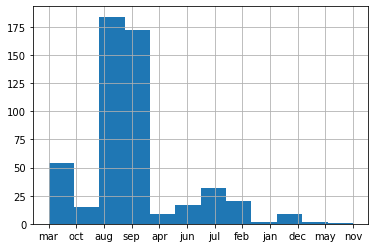

In [12]:
df['month'].hist(bins=12)

In [13]:
months = ["jan", "feb", "mar", "apr", "may", "jun", 
          "jul", "aug", "sep", "oct", "nov", "dec"]
df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)
df.sort_values('month',inplace=True)

<AxesSubplot:>

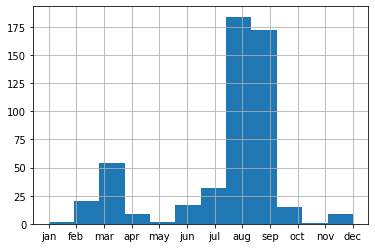

In [14]:
df['month'].hist(bins=12)

In [15]:
import numpy as np
df['Log-area']=np.log10(df['area']+1)

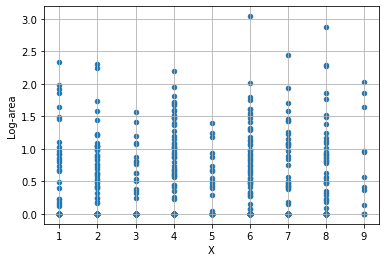

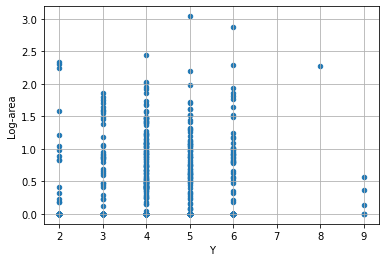

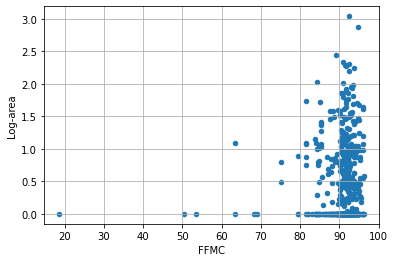

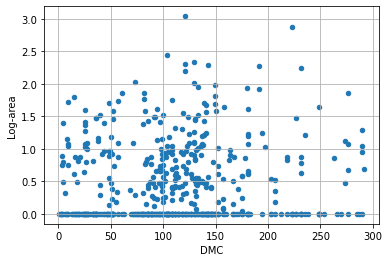

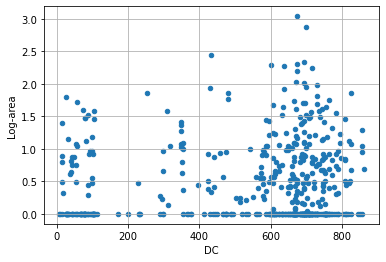

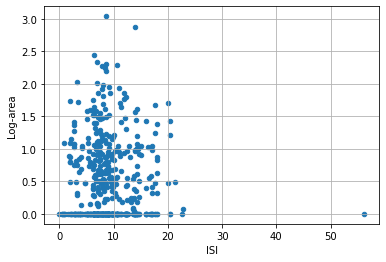

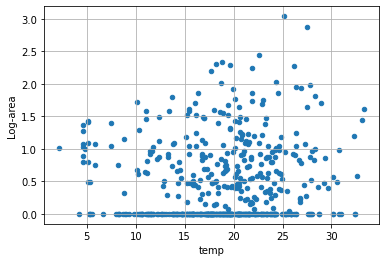

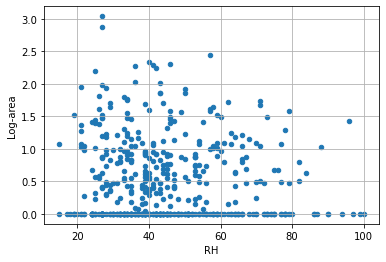

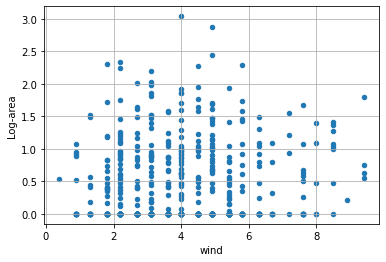

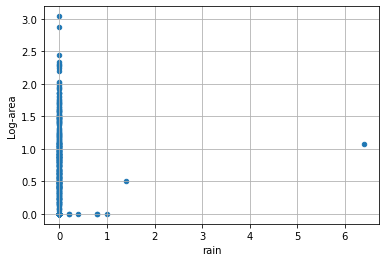

In [16]:
for i in df.describe().columns[:-2]:
    df.plot.scatter(i,'Log-area',grid=True)

<AxesSubplot:title={'center':'Log-area'}, xlabel='day'>

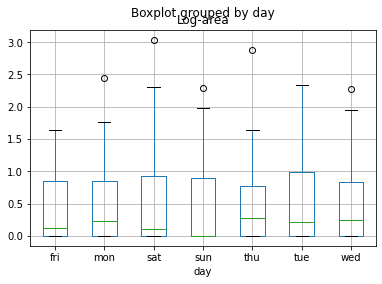

In [17]:
df.boxplot(column='Log-area',by='day')

<AxesSubplot:title={'center':'Log-area'}, xlabel='month'>

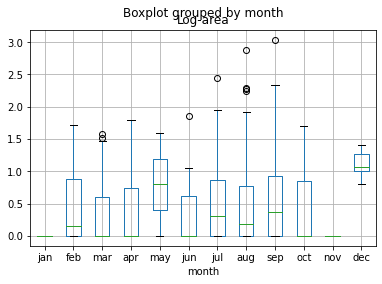

In [18]:
df.boxplot(column='Log-area',by='month')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [20]:
enc = LabelEncoder()
enc.fit(df['month'])

LabelEncoder()

In [21]:
enc.classes_

array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'], dtype=object)

In [22]:
df['month_encoded']=enc.transform(df['month'])
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Log-area,month_encoded
104,2,4,jan,sat,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.00,0.000000,4
379,4,5,jan,sun,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00,0.000000,4
96,3,4,feb,sat,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,0.00,0.000000,3
59,2,2,feb,fri,86.6,13.2,43.0,5.3,12.3,51,0.9,0.0,0.00,0.000000,3
202,7,4,feb,sun,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05,1.147676,3


In [23]:
enc.fit(df['day'])

LabelEncoder()

In [24]:
enc.classes_

array(['fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'], dtype=object)

In [25]:
df['day_encoded']=enc.transform(df['day'])
df.head(15)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Log-area,month_encoded,day_encoded
104,2,4,jan,sat,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.00,0.000000,4,2
379,4,5,jan,sun,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00,0.000000,4,3
96,3,4,feb,sat,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,0.00,0.000000,3,2
59,2,2,feb,fri,86.6,13.2,43.0,5.3,12.3,51,0.9,0.0,0.00,0.000000,3,0
202,7,4,feb,sun,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05,1.147676,3,3
76,9,9,feb,fri,86.6,13.2,43.0,5.3,15.7,43,3.1,0.0,0.00,0.000000,3,0
75,9,9,feb,thu,84.2,6.8,26.6,7.7,6.7,79,3.1,0.0,0.00,0.000000,3,4
182,5,4,feb,sun,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0,6.38,0.868056,3,3
284,5,4,feb,fri,85.2,4.9,15.8,6.3,7.5,46,8.0,0.0,24.24,1.402089,3,0
130,4,6,feb,sat,68.2,21.5,87.2,0.8,15.4,40,2.7,0.0,0.00,0.000000,3,2


In [26]:
test_size=0.4

In [27]:
X_data=df.drop(['area','Log-area','month','day'],axis=1)
y_data=df['Log-area']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

In [28]:
arr=y_train.values
y_train=arr.reshape((y_train.size,1))

In [29]:
def rec(m,n,tol):
    if type(m)!='numpy.ndarray':
        m=np.array(m)
    if type(n)!='numpy.ndarray':
        n=np.array(n)
    l=m.size
    percent = 0
    for i in range(l):
        if np.abs(10**m[i]-10**n[i])<=tol:
            percent+=1
    return 100*(percent/l)

In [30]:
tol_max=20

In [31]:

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [32]:
scaler = StandardScaler()

In [33]:
param_grid = {'C': [0.01,0.1,1, 10], 'epsilon': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [34]:
grid_SVR = GridSearchCV(SVR(),param_grid,refit=True,verbose=0,cv=5)
grid_SVR.fit(scaler.fit_transform(X_train),scaler.fit_transform(y_train))

F:\anacoda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\anacoda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\anacoda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\anacoda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\anacoda\lib\site-packages\sklearn\utils\valid

F:\anacoda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\anacoda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\anacoda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\anacoda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\anacoda\lib\site-packages\sklearn\utils\valid

F:\anacoda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\anacoda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\anacoda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\anacoda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\anacoda\lib\site-packages\sklearn\utils\valid

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'epsilon': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [35]:
print("Best parameters obtained by Grid Search:",grid_SVR.best_params_)

Best parameters obtained by Grid Search: {'C': 0.01, 'epsilon': 1, 'kernel': 'rbf'}


In [37]:
a=grid_SVR.predict(X_test)
print("RMSE for Support Vector Regression:",np.sqrt(np.mean((y_test-a)**2)))

RMSE for Support Vector Regression: 0.6470839953606987


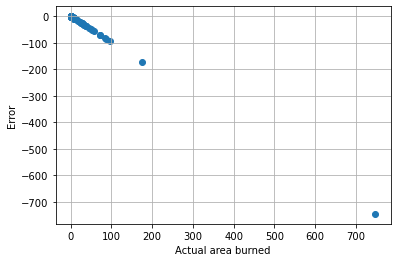

In [39]:
import matplotlib.pyplot as plt
plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.scatter(10**(y_test),10**(a)-10**(y_test))

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,
          2.,   2.,   3.,   7.,   9., 181.]),
 array([-7.45755081e+02, -7.30829481e+02, -7.15903881e+02, -7.00978281e+02,
        -6.86052681e+02, -6.71127081e+02, -6.56201481e+02, -6.41275881e+02,
        -6.26350281e+02, -6.11424681e+02, -5.96499081e+02, -5.81573481e+02,
        -5.66647881e+02, -5.51722281e+02, -5.36796681e+02, -5.21871081e+02,
        -5.06945481e+02, -4.92019881e+02, -4.77094281e+02, -4.62168681e+02,
        -4.47243081e+02, -4.32317481e+02, -4.17391881e+02, -4.02466281e+02,
        -3.87540681e+02, -3.72615081e+02, -3.57689481e+02, -3.42763881e+02,
        -3.27838281e+02, -3.12912681e+02, -2.97987081e+02, -2.83061481e+02,
        -2.68135881e+02, -2.53210281e+02, -2.38284

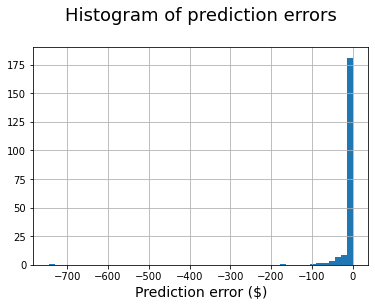

In [40]:
plt.title("Histogram of prediction errors\n",fontsize=18)
plt.xlabel("Prediction error ($)",fontsize=14)
plt.grid(True)
plt.hist(10**(a.reshape(a.size,))-10**(y_test),bins=50)

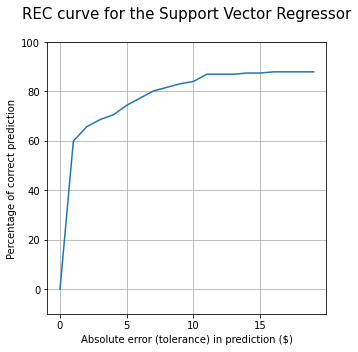

In [41]:
rec_SVR=[]
for i in range(tol_max):
    rec_SVR.append(rec(a,y_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for the Support Vector Regressor\n",fontsize=15)
plt.xlabel("Absolute error (tolerance) in prediction ($)")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i*5 for i in range(tol_max+1)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_SVR)

F:\anacoda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is 

F:\anacoda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a depreca

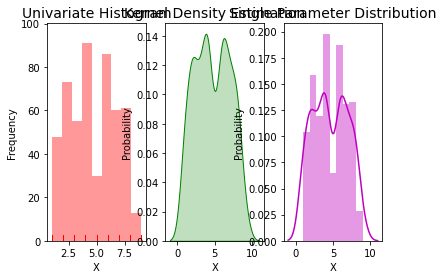

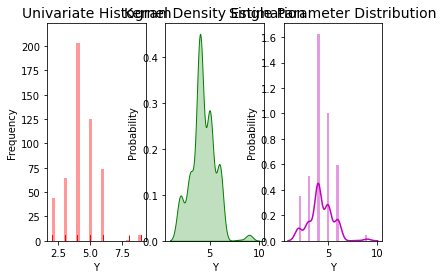

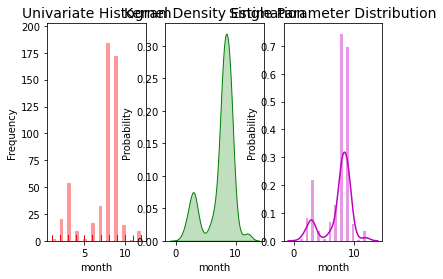

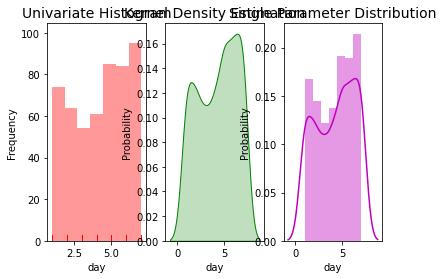

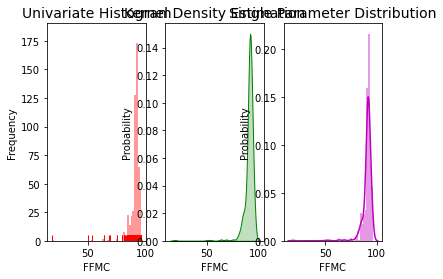

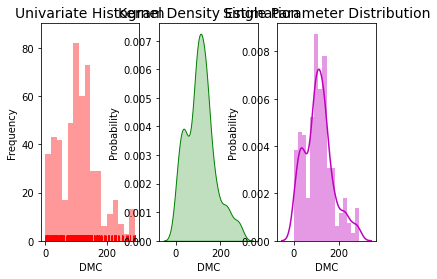

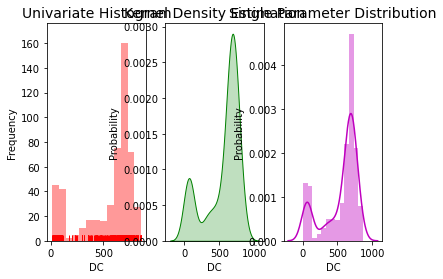

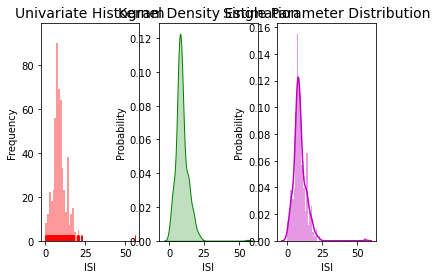

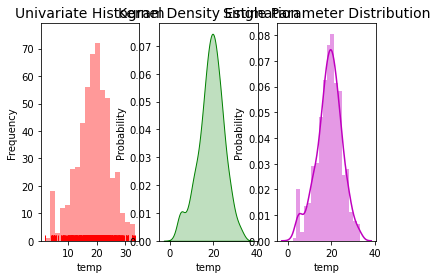

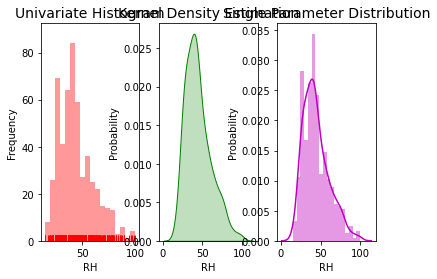

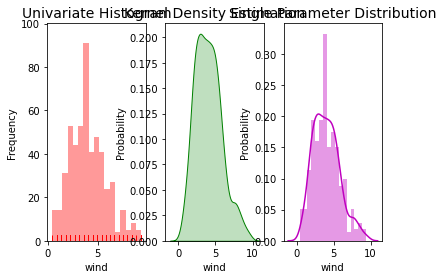

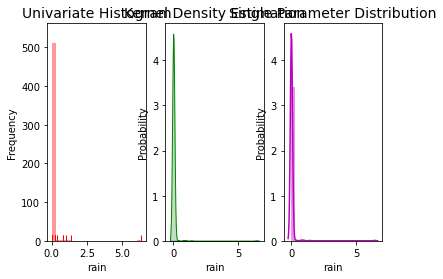

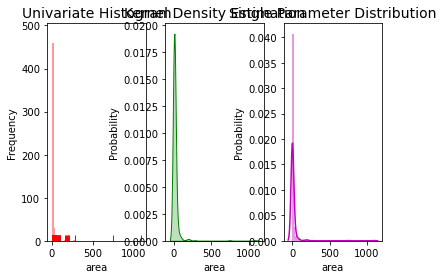

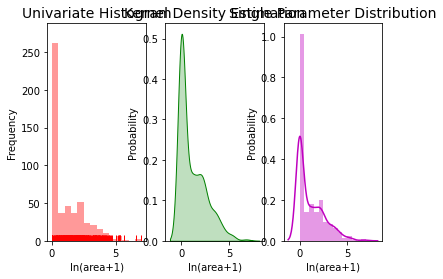

<Figure size 432x288 with 0 Axes>

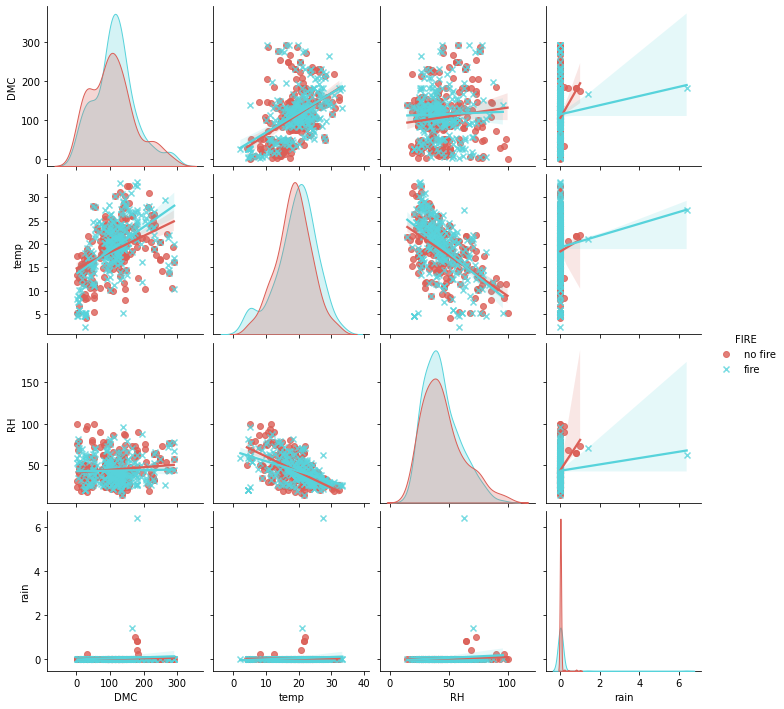

<Figure size 432x288 with 0 Axes>

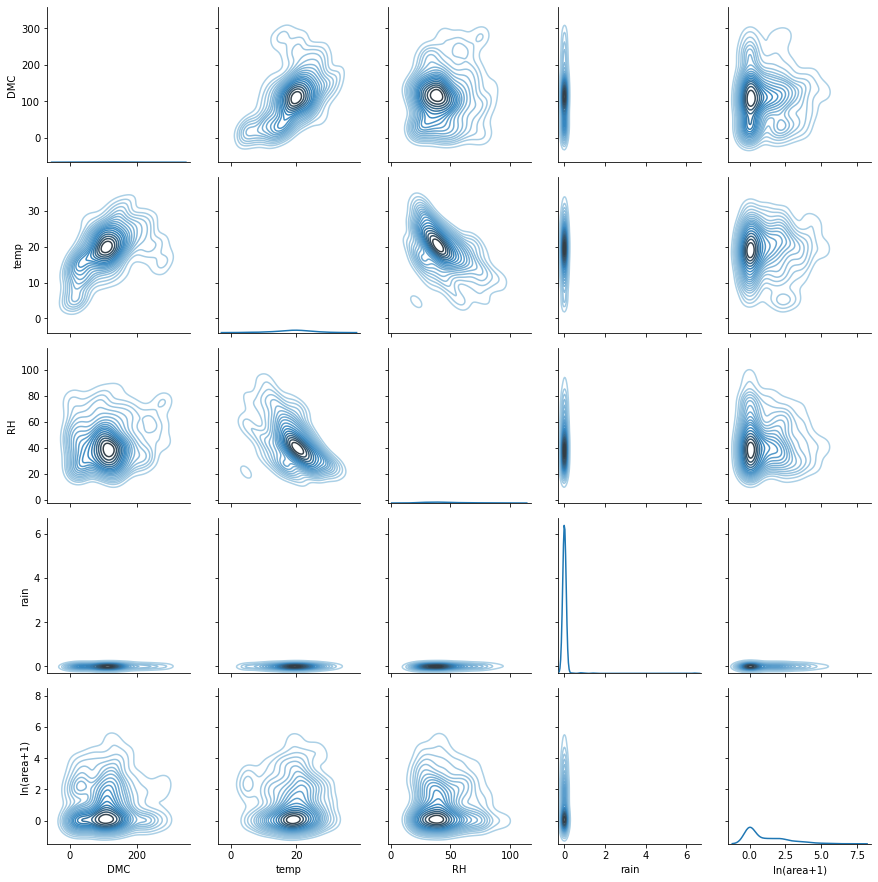

F:\anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\anacoda\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\

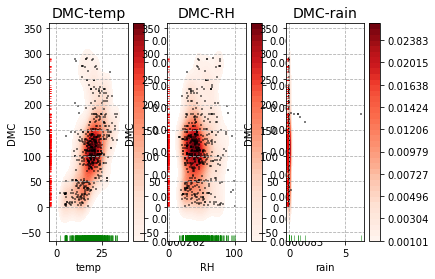

F:\anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\anacoda\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\

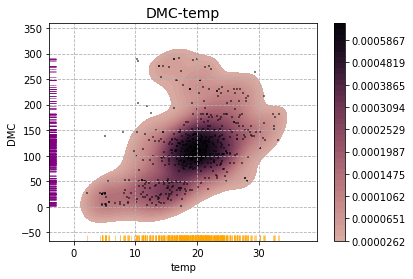

F:\anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\anacoda\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\

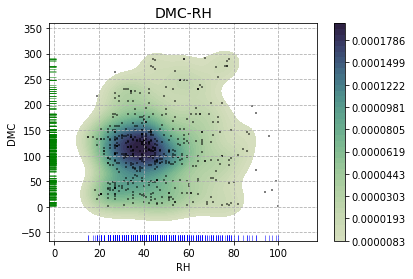

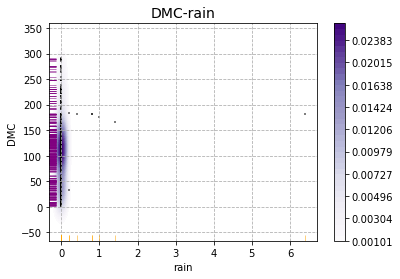

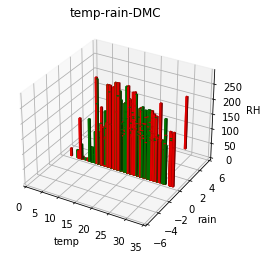

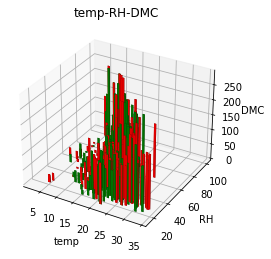

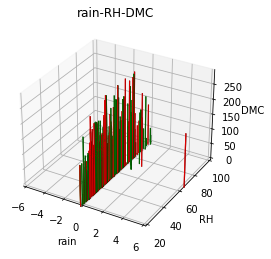

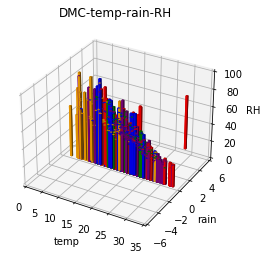

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D


fire = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')
fire.month=fire.month.map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})
fire.day=fire.day.map({'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':7})
data=pd.DataFrame(fire,columns=['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area'])

'''
1D: Univariate Histograms,Kernel Density Estimation and Single Parameter Distribution
'''
n=1
for i in ['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']:
	plt.figure(n)
	plt.subplot(131)# Univariate Histograms
	plt.title('Univariate Histogram', fontsize=14, position=(0.5,1.05))
	plt.ylabel('Frequency')
	sns.distplot(fire[i],kde=False,color='r',rug=True)
	plt.subplot(132) # Kernel Density Estimation
	plt.title('Kernel Density Estimation', fontsize=14, position=(0.5,1.05))
	plt.ylabel('Probability')
	sns.distplot(fire[i],hist=False,color='g',kde_kws={'shade':True})
	plt.subplot(133) # Single Parameter Distribution
	plt.title('Single Parameter Distribution', fontsize=14, position=(0.5,1.05))
	plt.ylabel('Probability')
	sns.distplot(fire[i],color='m')
	n += 1

'''
According to the above three plots of 'area' in figure 13, the parameter is pretty distorted towards 0.0
Thus using logrithm transform ln(area+1) to remodel 'area' and generate the new varibale 'ln(area+1)'
'''
fire['ln(area+1)']=np.log(fire['area']+1)
plt.figure(14)
plt.subplot(131)# Univariate Histograms
plt.title('Univariate Histogram', fontsize=14, position=(0.5,1.05))
plt.xlabel('ln(area+1)')
plt.ylabel('Frequency')
sns.distplot(fire['ln(area+1)'],kde=False,color='r',rug=True)
plt.subplot(132) #Kernel Density Estimation
plt.title('Kernel Density Estimation', fontsize=14, position=(0.5,1.05))
plt.ylabel('Probability')
plt.xlabel('ln(area+1)')
sns.distplot(fire['ln(area+1)'],hist=False,color='g',kde_kws={'shade':True})
plt.subplot(133) # Single Parameter Distribution
plt.title('Single Parameter Distribution', fontsize=14, position=(0.5,1.05))
plt.ylabel('Probability')
plt.xlabel('ln(area+1)')
sns.distplot(fire['ln(area+1)'],color='m')


'''
Based on the  forest Fire Weather Index system, DMC is influenced by temperature(temp), reletive humidity(RH) and rain
To clarify the correlation between DMC and the rest variables initially, create the pairplots.
figure 15: 16 pairplots totally
         :4 Diagonal plots: kde plots indicating the probability density of the variable
         :14 Non-Diagonal plots: scatter diagrams with linear regression line generated                      
         p.s.: for better visualization, adding variable'FIRE',which indicates 'fire' or 'no fire'
               and mark the data values with two colors(red for fire;green for no fire)
figrue 16: 16 pairplots totally
         :4 Diagonal plots: single paramter distribution
         :14 Non-Diagonal plots: kdeplots of two variables(the core indicates the highest density)
'''

plt.figure(15)
df1=pd.DataFrame(fire,columns=['DMC','temp','RH','rain','ln(area+1)'])

# set [ln(area+1)>0]=1 ; [ln(area+1)=0]=0 
df1['FIRE'] = np.where(df1['ln(area+1)']>0, 'fire', 'no fire')
sns.pairplot(df1,vars=['DMC','temp','RH','rain'],kind='reg',hue='FIRE',palette='hls',markers=["o", "x"])
plt.show()

plt.figure(16)
g = sns.PairGrid(df1)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot,cmap="Blues_d",n_levels=20)
plt.show()

'''
2D: 
figure 17: DMC-temp & DMC-RH & DMC-rain 
figure 18-20: DMC-temp / RH / rain
p.s.: for the plots related to rain, for better observation, adjustment is needed since scatters were initially distributed around 0.00
'''
plt.figure(17)
sub=131
for i in ['temp','RH','rain']:
	plt.subplot(sub)
	plt.title('DMC-'+i, fontsize=14, position=(0.5,1.05))
	sns.kdeplot(df1[i],df1['DMC'], # demonstrate the probability distribution of two variables
           cbar = True,    # display color bar
           shade = True,   # display shades
           cmap = 'Reds',  # set the color palatte
           shade_lowest=False,  # not display periphery color/shade
           n_levels = 40   # number of curves, the higher, the smoother
           )# the color change indicates the change of density
	plt.grid(linestyle = '--')
	plt.scatter(df1[i], df1['DMC'], s=5, alpha = 0.5, color = 'k', marker='+') #scatter
	sns.rugplot(df1[i], color='g', axis='x',alpha = 0.5)
	sns.rugplot(df1['DMC'], color='r', axis='y',alpha = 0.5)
	sub += 1
plt.show()

plt.figure(18) # DMC-temp
plt.title('DMC-temp', fontsize=14, position=(0.5,1.05))
pal=sns.cubehelix_palette(8, gamma=2,as_cmap=True)
sns.kdeplot(df1['temp'],df1['DMC'],cbar = True,shade = True,cmap = pal,shade_lowest=False,n_levels = 40)
plt.grid(linestyle = '--')
plt.scatter(df1['temp'], df1['DMC'], s=5, alpha = 0.5, color = 'k', marker='+') #scatter
sns.rugplot(df1['temp'], color="orange", axis='x',alpha = 0.5)
sns.rugplot(df1['DMC'], color="purple", axis='y',alpha = 0.5)
plt.show()

plt.figure(19) # DMC-RH
plt.title('DMC-RH', fontsize=14, position=(0.5,1.05))
pal=sns.cubehelix_palette(8, start=.5, rot=-.75,as_cmap=True)
sns.kdeplot(df1['RH'],df1['DMC'],cbar = True,shade = True,cmap = pal,shade_lowest=False,n_levels = 40)
plt.grid(linestyle = '--')
plt.scatter(df1['RH'], df1['DMC'], s=5, alpha = 0.5, color = 'k', marker='+') #scatter
sns.rugplot(df1['RH'], color="blue", axis='x',alpha = 0.5)
sns.rugplot(df1['DMC'], color="green", axis='y',alpha = 0.5)

plt.figure(20) # DMC-rain
plt.title('DMC-rain', fontsize=14, position=(0.5,1.05))
sns.kdeplot(df1['rain'],df1['DMC'],cbar = True,shade = True,cmap = 'Purples',shade_lowest=False,n_levels = 40)
plt.grid(linestyle = '--')
plt.scatter(df1['rain'], df1['DMC'], s=5, alpha = 0.5, color = 'k', marker='+') #scatter
sns.rugplot(df1['rain'], color="orange", axis='x',alpha = 0.5)
sns.rugplot(df1['DMC'], color="purple", axis='y',alpha = 0.5)
plt.show()

fig1=plt.figure(21)
ax = fig1.add_subplot(111, projection='3d')   

x,y,z = np.array(fire['temp']),np.array(fire['rain']),np.array(fire['DMC'])

x = x.flatten('F')   
y = y.flatten('F')

'''
mark the bars with two colors for better observation
red: fire
green: no fire
'''
q=df1['FIRE']
C = []  
for a in q:
    if a == 'fire':
        C.append('red')
    else:
        C.append('green')

dx = 0.6 * np.ones_like(x) # set the width of the histograms, the constant can be adjusted based on observation of plots
dy = 0.2 * np.ones_like(y)
dz = abs(z) * z.flatten()
dz = dz.flatten() / abs(z)
z = np.zeros_like(z)

ax.set_title('temp-rain-DMC')
ax.set_xlabel('temp')
ax.set_ylabel('rain')
ax.set_zlabel('RH')
plt.axis([0,35,-6,6])#set the interval of axises to move the bunch of histograms to the centeral area for better observation

ax.bar3d(x, y, z, dx, dy, dz, color=C, zsort='average')



fig2=plt.figure(22)
ax = fig2.add_subplot(111, projection='3d')   
x,y,z = np.array(fire['temp']),np.array(fire['RH']),np.array(fire['DMC'])

x = x.flatten('F')   
y = y.flatten('F')

dx = 0.6 * np.ones_like(x)# set the width of the histograms, the constant can be adjusted based on observation of plots
dy = 0.2 * np.ones_like(y)
dz = abs(z) * z.flatten()
dz = dz.flatten() / abs(z)
z = np.zeros_like(z)

ax.set_title('temp-RH-DMC')
ax.set_xlabel('temp')
ax.set_ylabel('RH')
ax.set_zlabel('DMC')

ax.bar3d(x, y, z, dx, dy, dz, color=C, zsort='average')


fig3=plt.figure(23)
ax = fig3.add_subplot(111, projection='3d')   
x,y,z = np.array(fire['rain']),np.array(fire['RH']),np.array(fire['DMC'])

x = x.flatten('F')   
y = y.flatten('F')

dx = 0.1 * np.ones_like(x)# set the width of the histograms, the constant can be adjusted based on observation of plots
dy = 0.2 * np.ones_like(y)
dz = abs(z) * z.flatten()
dz = dz.flatten() / abs(z)
z = np.zeros_like(z)

ax.set_title('rain-RH-DMC')
ax.set_xlabel('rain')
ax.set_ylabel('RH')
ax.set_zlabel('DMC')
plt.axis([-6,6,20,100]) #set the interval of axises to move the bunch of histograms to the centeral area for better observation
ax.bar3d(x, y, z, dx, dy, dz, color=C, zsort='average')
plt.show()

'''
4D:
axies:x: temp y:rain z:RH
4th demension: DMC 
displaying DMC by mark the bars with different colors based on the value intervals of DMC
'''
fig = plt.figure(24)
ax = fig.add_subplot(111, projection='3d')   

x,y,z = np.array(fire['temp']),np.array(fire['rain']),np.array(fire['RH'])

x = x.flatten('F')   
y = y.flatten('F')

# Based on the interval values of DMC, mark the histograms with different colors
q=fire['DMC']
C = [] # the list serving as the color palatte 
for a in q:
    if a < 50:
        C.append('orange') # for data from DMC <50, mark it with orange 
    elif a < 100:
        C.append('blue') # for data from DMC belonging to [50,100), mark it with blue
    elif a < 150:
        C.append('purple') # for data from DMC belonging to [100,150), mark it with purple
    elif a < 200:
        C.append('red') # for data from DMC belonging to [150,200), mark it with red
    elif a > 200:
        C.append('green') # for data from DMC >200, mark it with greem

#dx，dy，dz:length width altitude
dx = 0.6 * np.ones_like(x)# set the width of the bars, the constant can be adjusted based on observation of plots
dy = 0.2 * np.ones_like(y)
dz = abs(z) * z.flatten()
dz = dz.flatten() / abs(z)
z = np.zeros_like(z)


ax.set_title('DMC-temp-rain-RH')
ax.set_xlabel('temp')
ax.set_ylabel('rain')
ax.set_zlabel('RH')
plt.axis([0,35,-6,6])#set the interval of axises to move the bunch of histograms to the centeral area for better observation

ax.bar3d(x, y, z, dx, dy, dz, color=C, zsort='average')
plt.show()

F:\anacoda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is 

F:\anacoda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a depreca

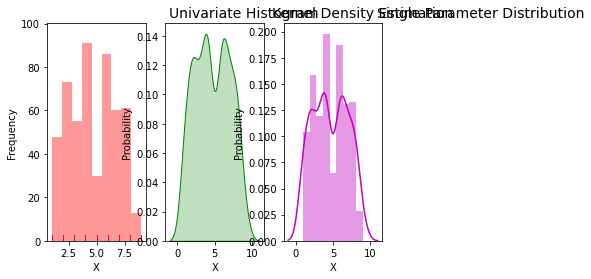

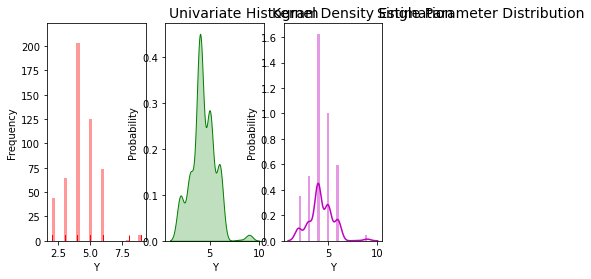

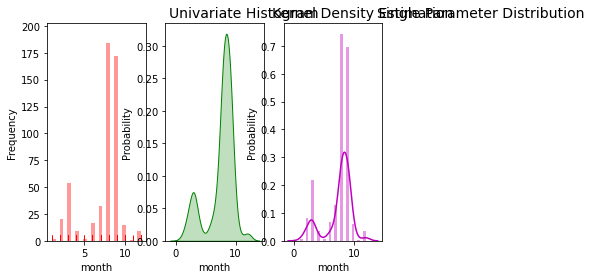

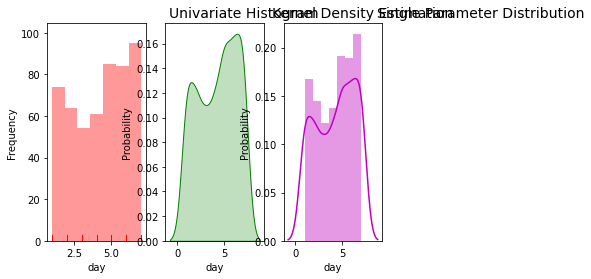

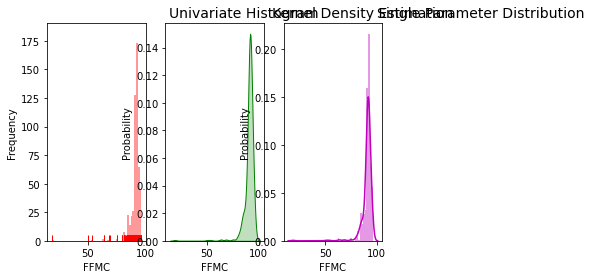

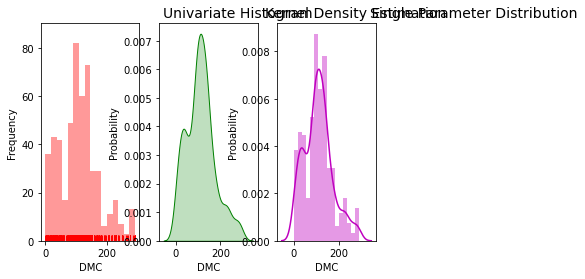

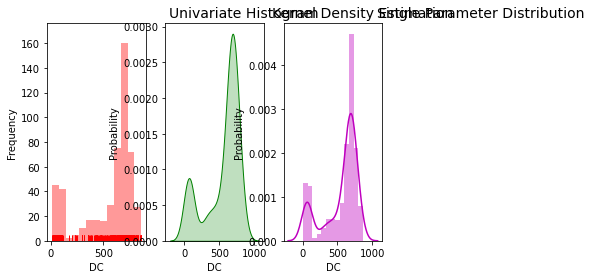

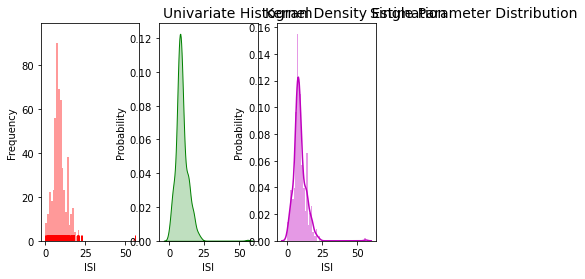

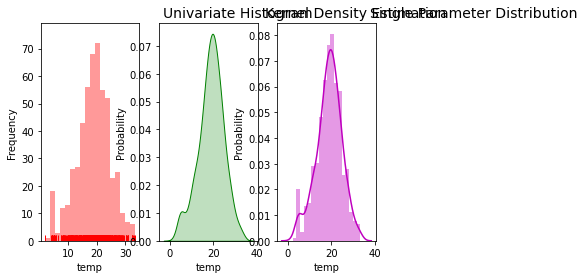

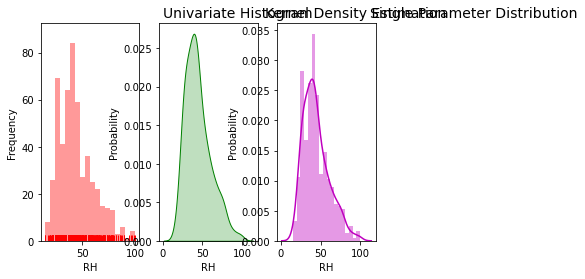

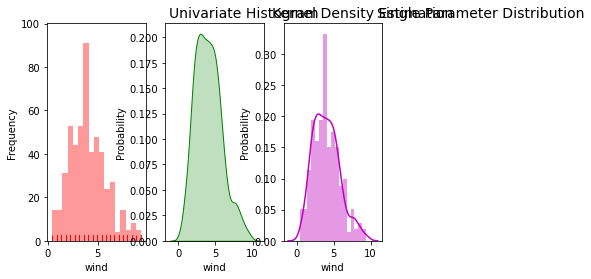

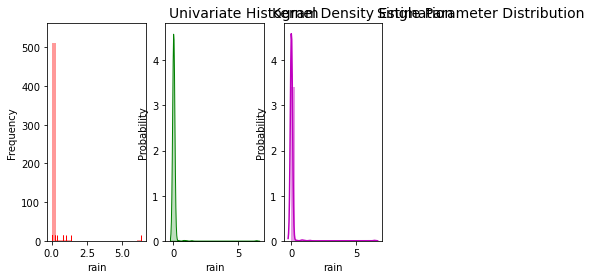

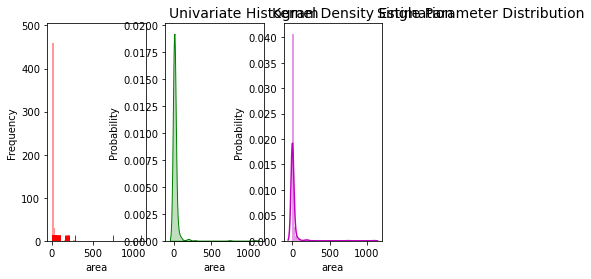

In [49]:
n=1
for i in ['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']:
	plt.figure(n)
	plt.subplot(131)# Univariate Histograms
	plt.title('Univariate Histogram', fontsize=14, position=(2,2))
	plt.ylabel('Frequency')
	sns.distplot(fire[i],kde=False,color='r',rug=True)
	plt.subplot(132) # Kernel Density Estimation
	plt.title('Kernel Density Estimation', fontsize=14, position=(2,2))
	plt.ylabel('Probability')
	sns.distplot(fire[i],hist=False,color='g',kde_kws={'shade':True})
	plt.subplot(133) # Single Parameter Distribution
	plt.title('Single Parameter Distribution', fontsize=14, position=(2,2))
	plt.ylabel('Probability')
	sns.distplot(fire[i],color='m')
	n += 1

<Figure size 432x288 with 0 Axes>

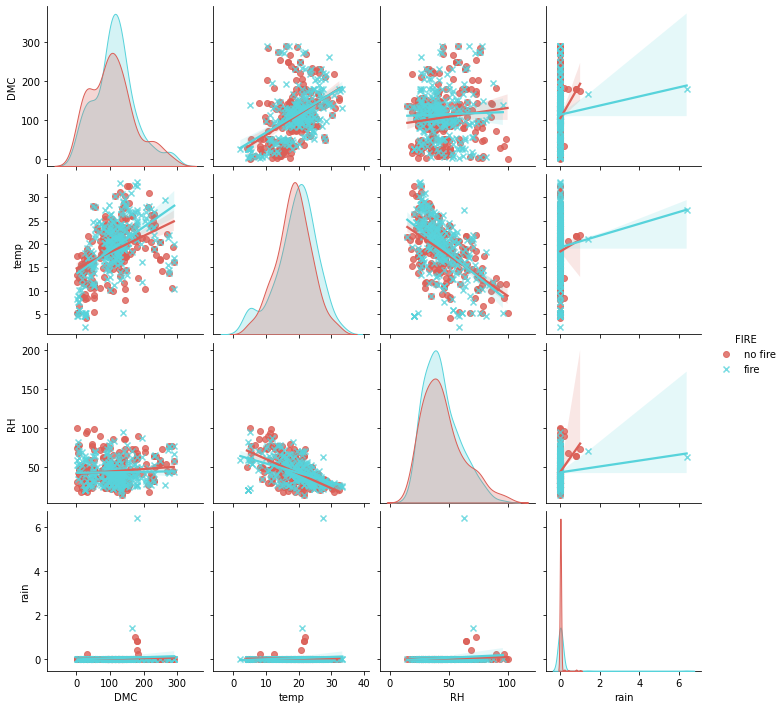

<Figure size 432x288 with 0 Axes>

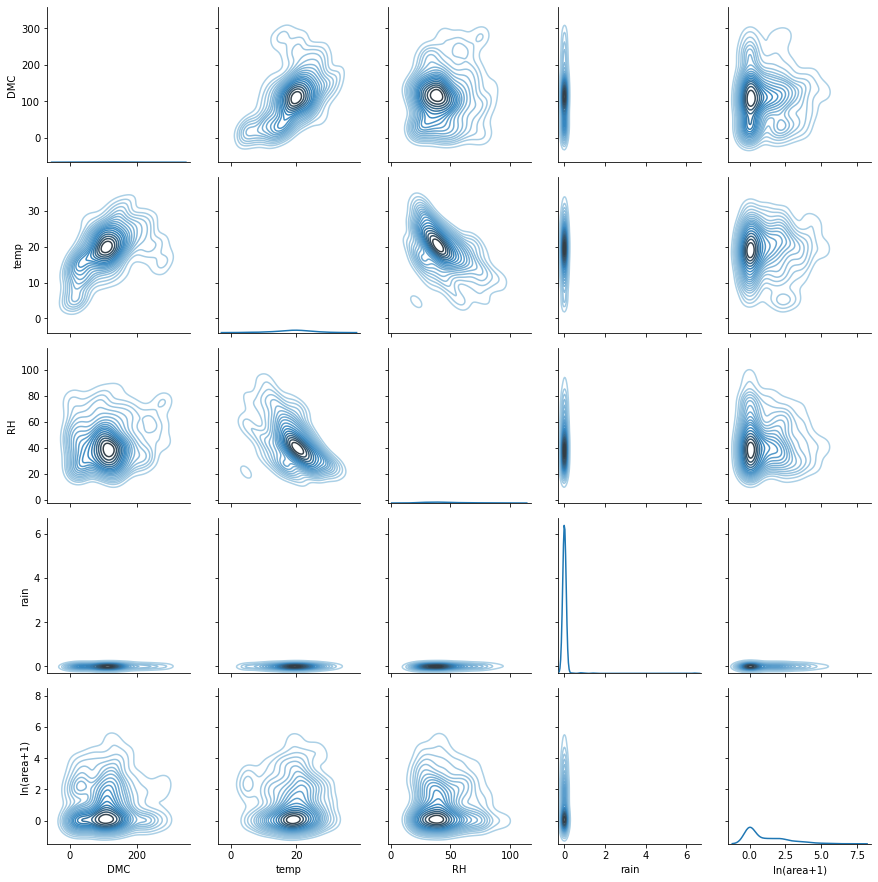

In [50]:
plt.figure(15)
df1=pd.DataFrame(fire,columns=['DMC','temp','RH','rain','ln(area+1)'])

# set [ln(area+1)>0]=1 ; [ln(area+1)=0]=0 
df1['FIRE'] = np.where(df1['ln(area+1)']>0, 'fire', 'no fire')
sns.pairplot(df1,vars=['DMC','temp','RH','rain'],kind='reg',hue='FIRE',palette='hls',markers=["o", "x"])
plt.show()

plt.figure(16)
g = sns.PairGrid(df1)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot,cmap="Blues_d",n_levels=20)
plt.show()

F:\anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\anacoda\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\

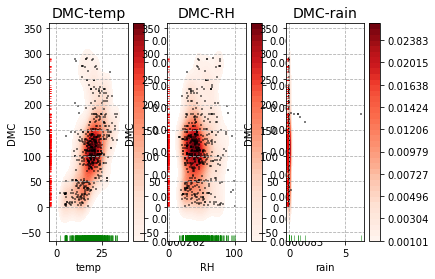

F:\anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\anacoda\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\

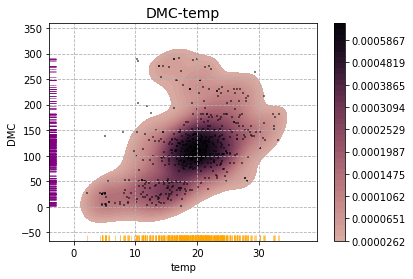

F:\anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\anacoda\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\

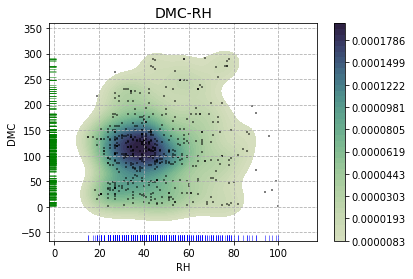

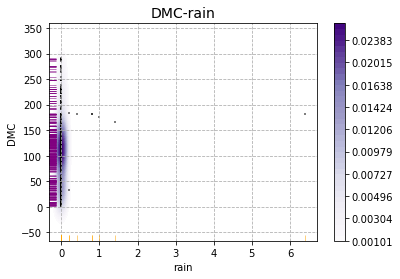

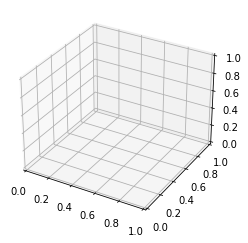

In [52]:
plt.figure(17)
sub=131
for i in ['temp','RH','rain']:
	plt.subplot(sub)
	plt.title('DMC-'+i, fontsize=14, position=(0.5,1.05))
	sns.kdeplot(df1[i],df1['DMC'], # demonstrate the probability distribution of two variables
           cbar = True,    # display color bar
           shade = True,   # display shades
           cmap = 'Reds',  # set the color palatte
           shade_lowest=False,  # not display periphery color/shade
           n_levels = 40   # number of curves, the higher, the smoother
           )# the color change indicates the change of density
	plt.grid(linestyle = '--')
	plt.scatter(df1[i], df1['DMC'], s=5, alpha = 0.5, color = 'k', marker='+') #scatter
	sns.rugplot(df1[i], color='g', axis='x',alpha = 0.5)
	sns.rugplot(df1['DMC'], color='r', axis='y',alpha = 0.5)
	sub += 1
plt.show()

plt.figure(18) # DMC-temp
plt.title('DMC-temp', fontsize=14, position=(0.5,1.05))
pal=sns.cubehelix_palette(8, gamma=2,as_cmap=True)
sns.kdeplot(df1['temp'],df1['DMC'],cbar = True,shade = True,cmap = pal,shade_lowest=False,n_levels = 40)
plt.grid(linestyle = '--')
plt.scatter(df1['temp'], df1['DMC'], s=5, alpha = 0.5, color = 'k', marker='+') #scatter
sns.rugplot(df1['temp'], color="orange", axis='x',alpha = 0.5)
sns.rugplot(df1['DMC'], color="purple", axis='y',alpha = 0.5)
plt.show()

plt.figure(19) # DMC-RH
plt.title('DMC-RH', fontsize=14, position=(0.5,1.05))
pal=sns.cubehelix_palette(8, start=.5, rot=-.75,as_cmap=True)
sns.kdeplot(df1['RH'],df1['DMC'],cbar = True,shade = True,cmap = pal,shade_lowest=False,n_levels = 40)
plt.grid(linestyle = '--')
plt.scatter(df1['RH'], df1['DMC'], s=5, alpha = 0.5, color = 'k', marker='+') #scatter
sns.rugplot(df1['RH'], color="blue", axis='x',alpha = 0.5)
sns.rugplot(df1['DMC'], color="green", axis='y',alpha = 0.5)

plt.figure(20) # DMC-rain
plt.title('DMC-rain', fontsize=14, position=(0.5,1.05))
sns.kdeplot(df1['rain'],df1['DMC'],cbar = True,shade = True,cmap = 'Purples',shade_lowest=False,n_levels = 40)
plt.grid(linestyle = '--')
plt.scatter(df1['rain'], df1['DMC'], s=5, alpha = 0.5, color = 'k', marker='+') #scatter
sns.rugplot(df1['rain'], color="orange", axis='x',alpha = 0.5)
sns.rugplot(df1['DMC'], color="purple", axis='y',alpha = 0.5)
plt.show()

fig1=plt.figure(21)
ax = fig1.add_subplot(111, projection='3d')   

x,y,z = np.array(fire['temp']),np.array(fire['rain']),np.array(fire['DMC'])

x = x.flatten('F')   
y = y.flatten('F')

<Figure size 432x288 with 0 Axes>

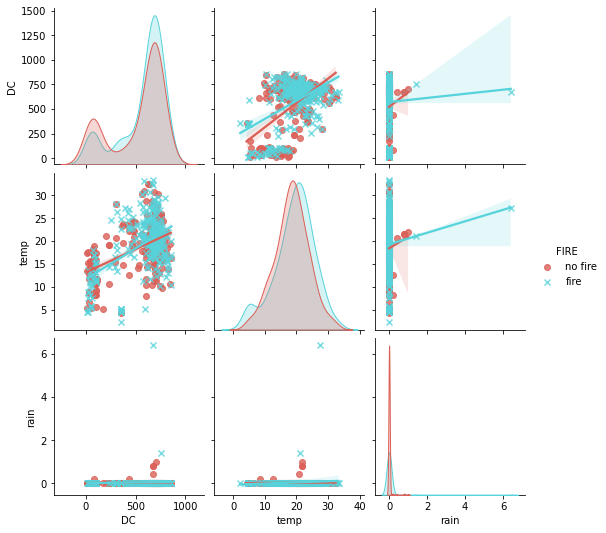

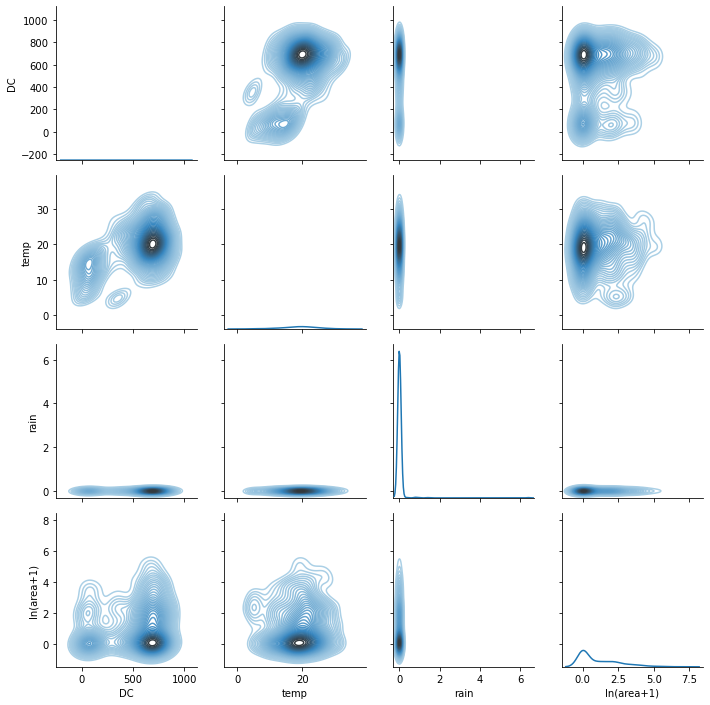

F:\anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\anacoda\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\

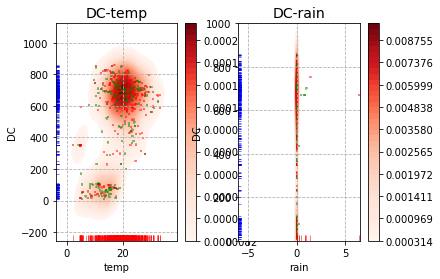

F:\anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\anacoda\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\

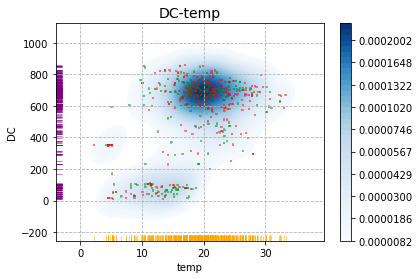

F:\anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\anacoda\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
F:\anacoda\lib\site-packages\seaborn\

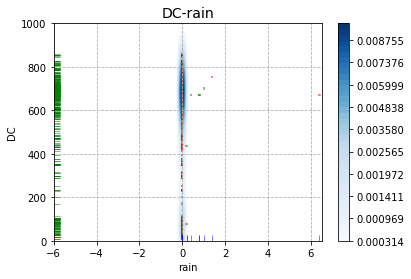

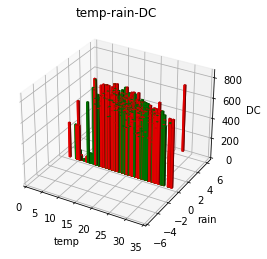

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D


fire = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')
fire.month=fire.month.map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})
fire.day=fire.day.map({'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':7})
data=pd.DataFrame(fire,columns=['X','Y','month','day','FFMC','DC','DC','ISI','temp','RH','wind','rain','area'])

'''
According to the plots of 'area', the parameter is pretty distorted towards 0.0
Thus using logrithm transform ln(area+1) to remodel 'area' and generate the new varibale 'ln(area+1)'
'''
fire['ln(area+1)']=np.log(fire['area']+1)

'''
Based on the  forest Fire Weather Index system, DC is influenced by temperature(temp) and rain
To clarify the correlation between DC and the rest variables initially, create the pairplots.
figure 15: 16 pairplots totally
         :4 Diagonal plots: kde plots indicating the probability density of the variable
         :14 Non-Diagonal plots: scatter diagrams with linear regression line generated                      
         p.s.: for better visualization, adding variable'FIRE',which indicates 'fire' or 'no fire'
               and mark the data values with two colors(red for fire;green for no fire)
figrue 16: 16 pairplots totally
         :4 Diagonal plots: single paramter distribution
         :14 Non-Diagonal plots: kdeplots of two variables(the core indicates the highest density)
'''

plt.figure(1)
df1=pd.DataFrame(fire,columns=['DC','temp','rain','ln(area+1)'])
# set [ln(area+1)>0]=1 ; [ln(area+1)=0]=0 
df1['FIRE'] = np.where(df1['ln(area+1)']>0, 'fire', 'no fire')
sns.pairplot(df1,vars=['DC','temp','rain'],kind='reg',hue='FIRE',palette='hls',markers=["o", "x"])

plt.figure(2)
g = sns.PairGrid(df1)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot,cmap="Blues_d",n_levels=40)
plt.show()

'''
2D: 
figure 17: DC-temp & DC-RH & DC-rain 
figure 18-20: DC-temp / RH / rain
p.s.: for the plots related to rain, for better observation, adjustment is needed since scatters were initially distributed around 0.00
'''

'''
mark the bars/scatters with two colors for better observation
red: fire ; green: no fire
'''
q=df1['FIRE']
C = []  # the list serving as the color palatte 
for a in q:
    if a == 'fire':
        C.append('red') # mark the bars/scatters with red color if there's fire
    else:
        C.append('green') # mark the bars/scatters with green color if there's no fire

plt.figure(3)
sub=121
for i in ['temp','rain']:
  plt.subplot(sub)
  plt.title('DC-'+i, fontsize=14, position=(0.5,1.05))
  pal='Reds'
  sns.kdeplot(df1[i],df1['DC'], # demonstrate the probability distribution of two variables
           cbar = True,    # display color bar
           shade = True,   # display shades
           cmap = pal,  # set the color palatte
           shade_lowest=False,  # not display periphery color/shade
           n_levels = 40   # number of curves, the higher, the smoother
           )# the color change indicates the change of density
  plt.grid(linestyle = '--')
  plt.scatter(df1[i], df1['DC'], s=5, alpha = 0.5, color = C, marker='+') #scatter(green:no fire; red:fire)
  if sub==122:
    plt.axis([-6,6.5,0,1000])
  sns.rugplot(df1[i], color='r', axis='x',alpha = 0.5)
  sns.rugplot(df1['DC'], color='blue', axis='y',alpha = 0.5)
  sub += 1
plt.show()

plt.figure(4) # DC-temp
plt.title('DC-temp', fontsize=14, position=(0.5,1.05))
pal='Blues'
sns.kdeplot(df1['temp'],df1['DC'],cbar = True,shade = True,cmap = pal,shade_lowest=False,n_levels = 40)
plt.grid(linestyle = '--')
plt.scatter(df1['temp'], df1['DC'], s=5, alpha = 0.5, color = C, marker='+') #scatter(green:no fire; red:fire)
sns.rugplot(df1['temp'], color="orange", axis='x',alpha = 0.5)
sns.rugplot(df1['DC'], color="purple", axis='y',alpha = 0.5)
plt.show()

plt.figure(5) # DC-rain
plt.title('DC-rain', fontsize=14, position=(0.5,1.05))
pal='Blues'
sns.kdeplot(df1['rain'],df1['DC'],cbar = True,shade = True,cmap = pal,shade_lowest=False,n_levels = 40)
plt.grid(linestyle = '--')
plt.scatter(df1['rain'], df1['DC'], s=5, alpha = 0.5, color = C, marker='+') #scatter(green:no fire; red:fire)
sns.rugplot(df1['rain'], color="blue", axis='x',alpha = 0.5)
sns.rugplot(df1['DC'], color="green", axis='y',alpha = 0.5)
plt.axis([-6,6.5,0,1000])
plt.show()

'''
3D: DC & temp,rain
  Figure 21-23:histograms: x,y-axis: temp,rain z-axis: DMC
  classify the histograms by variable 'FIRE': (red histograms:fire; green histograms:no fire)
'''
fig1=plt.figure(6)
ax = fig1.add_subplot(111, projection='3d')   

x,y,z = np.array(fire['temp']),np.array(fire['rain']),np.array(fire['DC'])
x = x.flatten('F')   
y = y.flatten('F')


dx = 0.6 * np.ones_like(x) # set the width of the histograms, the constant can be adjusted based on observation of plots
dy = 0.2 * np.ones_like(y)
dz = abs(z) * z.flatten()
dz = dz.flatten() / abs(z)
z = np.zeros_like(z)

ax.set_title('temp-rain-DC')
ax.set_xlabel('temp')
ax.set_ylabel('rain')
ax.set_zlabel('DC')
plt.axis([0,35,-6,6.5])#set the interval of axises to move the bunch of histograms to the centeral area for better observation

ax.bar3d(x, y, z, dx, dy, dz, color=C, zsort='average') #green bars: no fire; red bars:fire
plt.show()

<ipython-input-55-4bbd03595202>:25: UserWarning: Legend does not support 'blue' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(colors, labels, loc="best")
<ipython-input-55-4bbd03595202>:25: UserWarning: Legend does not support 'orange' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(colors, labels, loc="best")


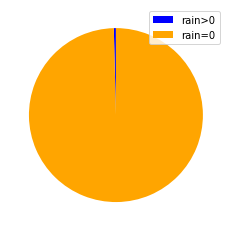

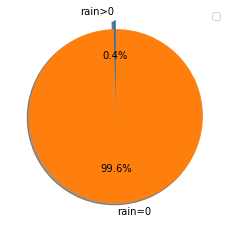

In [55]:
import pandas as pd

intensity=df.area
rain=df.rain

def rain_plot(rain):
    '''
    Plots chart showing the variance of the feature-rain in the data
    '''
    import matplotlib.pyplot as plt
    assert isinstance(rain, pd.core.series.Series)
    assert rain.all()>=0
    r_1=rain[rain.le(1)].count() 
    r_2=rain[rain.le(4)].count()
    r_3=rain[rain.ge(4)].count()
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels ='rain>0','rain=0'
    sizes = [r_2+r_3-r_1,r_1]
    explode = (0.1,0)
    colors = ['blue','orange']
    patches, texts = plt.pie(sizes, colors=colors, startangle=90)
    plt.legend(patches, labels, loc="best")
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    plt.legend(colors, labels, loc="best")
    plt.show()
    
rain_plot(rain)